In [330]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [331]:
x=np.linspace(-5,5,500)

In [332]:
P=2
x0=1

def f(x):
    x=x0+np.mod(x+x0,P)
    return np.where(x<1,x,2-x)

In [333]:
n=50

In [334]:
def getFourier():
    an=[]
    bn=[]
    for i in range(n):
        an.append(2/P*scipy.integrate.quad(lambda x: (f(x)*np.cos(i*2*np.pi/P*x)),0,P)[0])
        bn.append(2/P*scipy.integrate.quad(lambda x: (f(x)*np.sin(i*2*np.pi/P*x)),0,P)[0])
    return np.array(an),np.array(bn)

In [335]:
    a,b=getFourier()
    a[0]/=2

<BarContainer object of 50 artists>

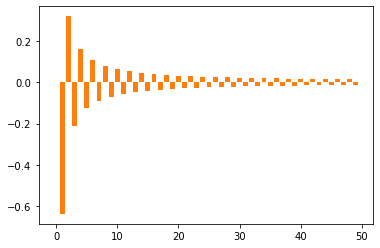

In [336]:
plt.bar([i for i in range(n)],a)
plt.bar([i for i in range(n)],b)

Text(0.5, 0.98, 'Spectrum')

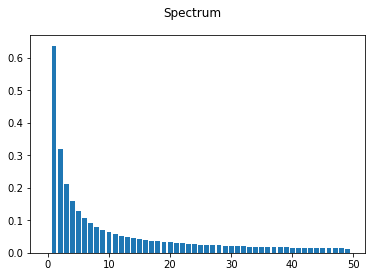

In [337]:
plt.bar([i for i in range(n)],np.sqrt(a*a+b*b))
plt.suptitle('Spectrum')

In [338]:
cosines=np.array([ np.cos(i*2*np.pi/P*x) for i in range(0,n)])
sinuses=np.array([ np.sin(i*2*np.pi/P*x) for i in range(0,n)])

In [339]:
sC=(cosines.T*a).T
sS=(sinuses.T*b).T

In [340]:
SC=np.sum(sC,axis=0)
SS=np.sum(sS,axis=0)
S=SC+SS

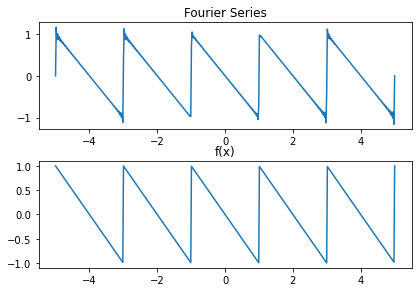

In [341]:
fig,(ax1,ax2)=plt.subplots(2,1)
fig.tight_layout()

ax1.plot(x,S)
ax1.title.set_text('Fourier Series')

ax2.plot(x,f(x))
ax2.title.set_text('f(x)')